### Problem Statement

* Task 1:-Create a predictive model which will help the insurance marketing team
to know which customer will buy the product.
* Task 2:-Suggestions to the Insurance market team to make customers buy the
product.

### Importing Libraries :

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('train.csv')

### Basic Checks:

In [6]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [8]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

* No Null Values in the dataset

* Total_columns = 59
* Total Rows = 595211

### Data Preprocessing:

In [13]:
# checking Null values
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0



* There are no null values

In [15]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [16]:
data1 = data.drop('target',axis = 1)

In [17]:
data1

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0


#### Scaling :

In [19]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data2=sc.fit_transform(data1)

In [20]:
# # converting it to dataframe and storing in data3
Scaled_data=pd.DataFrame(data2,columns=data1.columns)

In [21]:
Scaled_data

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-1.732308,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,...,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,-1.732303,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,-1.732294,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,-1.732287,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,-1.732284,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1.733269,0.554304,-0.540094,2.065514,-0.844892,-0.299997,-0.805893,-0.588179,-0.442786,2.096794,...,-0.617858,-0.367359,3.615414,-0.560329,-0.373505,0.769910,0.896917,-0.634730,1.365700,2.349973
595208,1.733276,1.562477,-0.540094,-0.527174,-0.844892,-0.299997,-0.805893,-0.588179,-0.442786,2.096794,...,-0.617858,-0.367359,0.075352,0.167831,2.677337,-1.298852,0.896917,-0.634730,1.365700,2.349973
595209,1.733279,-0.453868,-0.540094,2.065514,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,0.463923,-0.514659,-0.560329,-0.373505,-1.298852,0.896917,-0.634730,-0.732225,-0.425537
595210,1.733288,1.562477,0.964585,-0.527174,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,-0.367359,0.665362,-2.016649,-0.373505,0.769910,0.896917,1.575473,-0.732225,-0.425537


#### PCA :

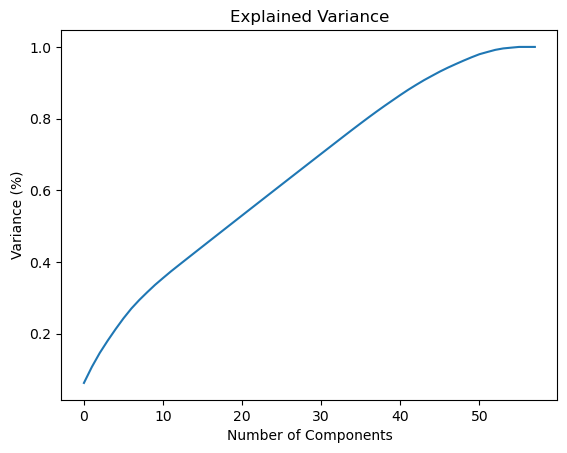

In [23]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(Scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [24]:
pca = PCA(n_components=45)
new_data = pca.fit_transform(Scaled_data)
# This will be the new data fed to the algorithm.
column_names = [f'PC{i+1}' for i in range(45)]
principal_Df = pd.DataFrame(data = new_data,columns = column_names)

In [25]:
## new pca dataframe
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,1.366923,-0.000636,-0.402431,-0.128765,-0.545881,-2.661299,-1.320671,0.308890,-0.953273,-1.220924,...,0.190838,0.464608,0.999905,0.049608,0.585055,0.377067,-1.418832,-0.822626,0.164751,0.559505
1,-0.871790,1.000563,0.881721,-0.992198,-2.035722,0.705292,0.037389,1.488223,-1.656419,1.082660,...,-0.686401,0.081641,0.621326,-0.641717,0.394955,0.148981,0.087755,0.718573,0.062985,0.265365
2,-1.776699,-0.766402,-1.229443,3.049990,0.537194,-1.272042,0.745266,2.640906,-1.093703,1.947547,...,1.589889,0.244410,0.641412,0.498498,-0.821143,1.323581,-3.126645,0.948320,-0.558646,-0.185937
3,-1.653450,0.134803,0.500191,0.102607,0.491352,1.682848,-0.974899,-0.138383,2.509067,0.467976,...,0.608343,-0.542523,1.249901,0.527597,0.056246,-0.245224,0.833738,-0.157007,-0.038256,-1.231842
4,-1.911953,-0.431362,1.580045,-1.297609,0.861455,0.460791,1.364608,1.412205,1.711588,-0.021488,...,1.356475,0.009044,0.058521,0.734468,-0.493489,0.001066,0.192918,0.132277,0.064459,0.395791


Here, we see that earlier we had 60 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 45. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

<Axes: >

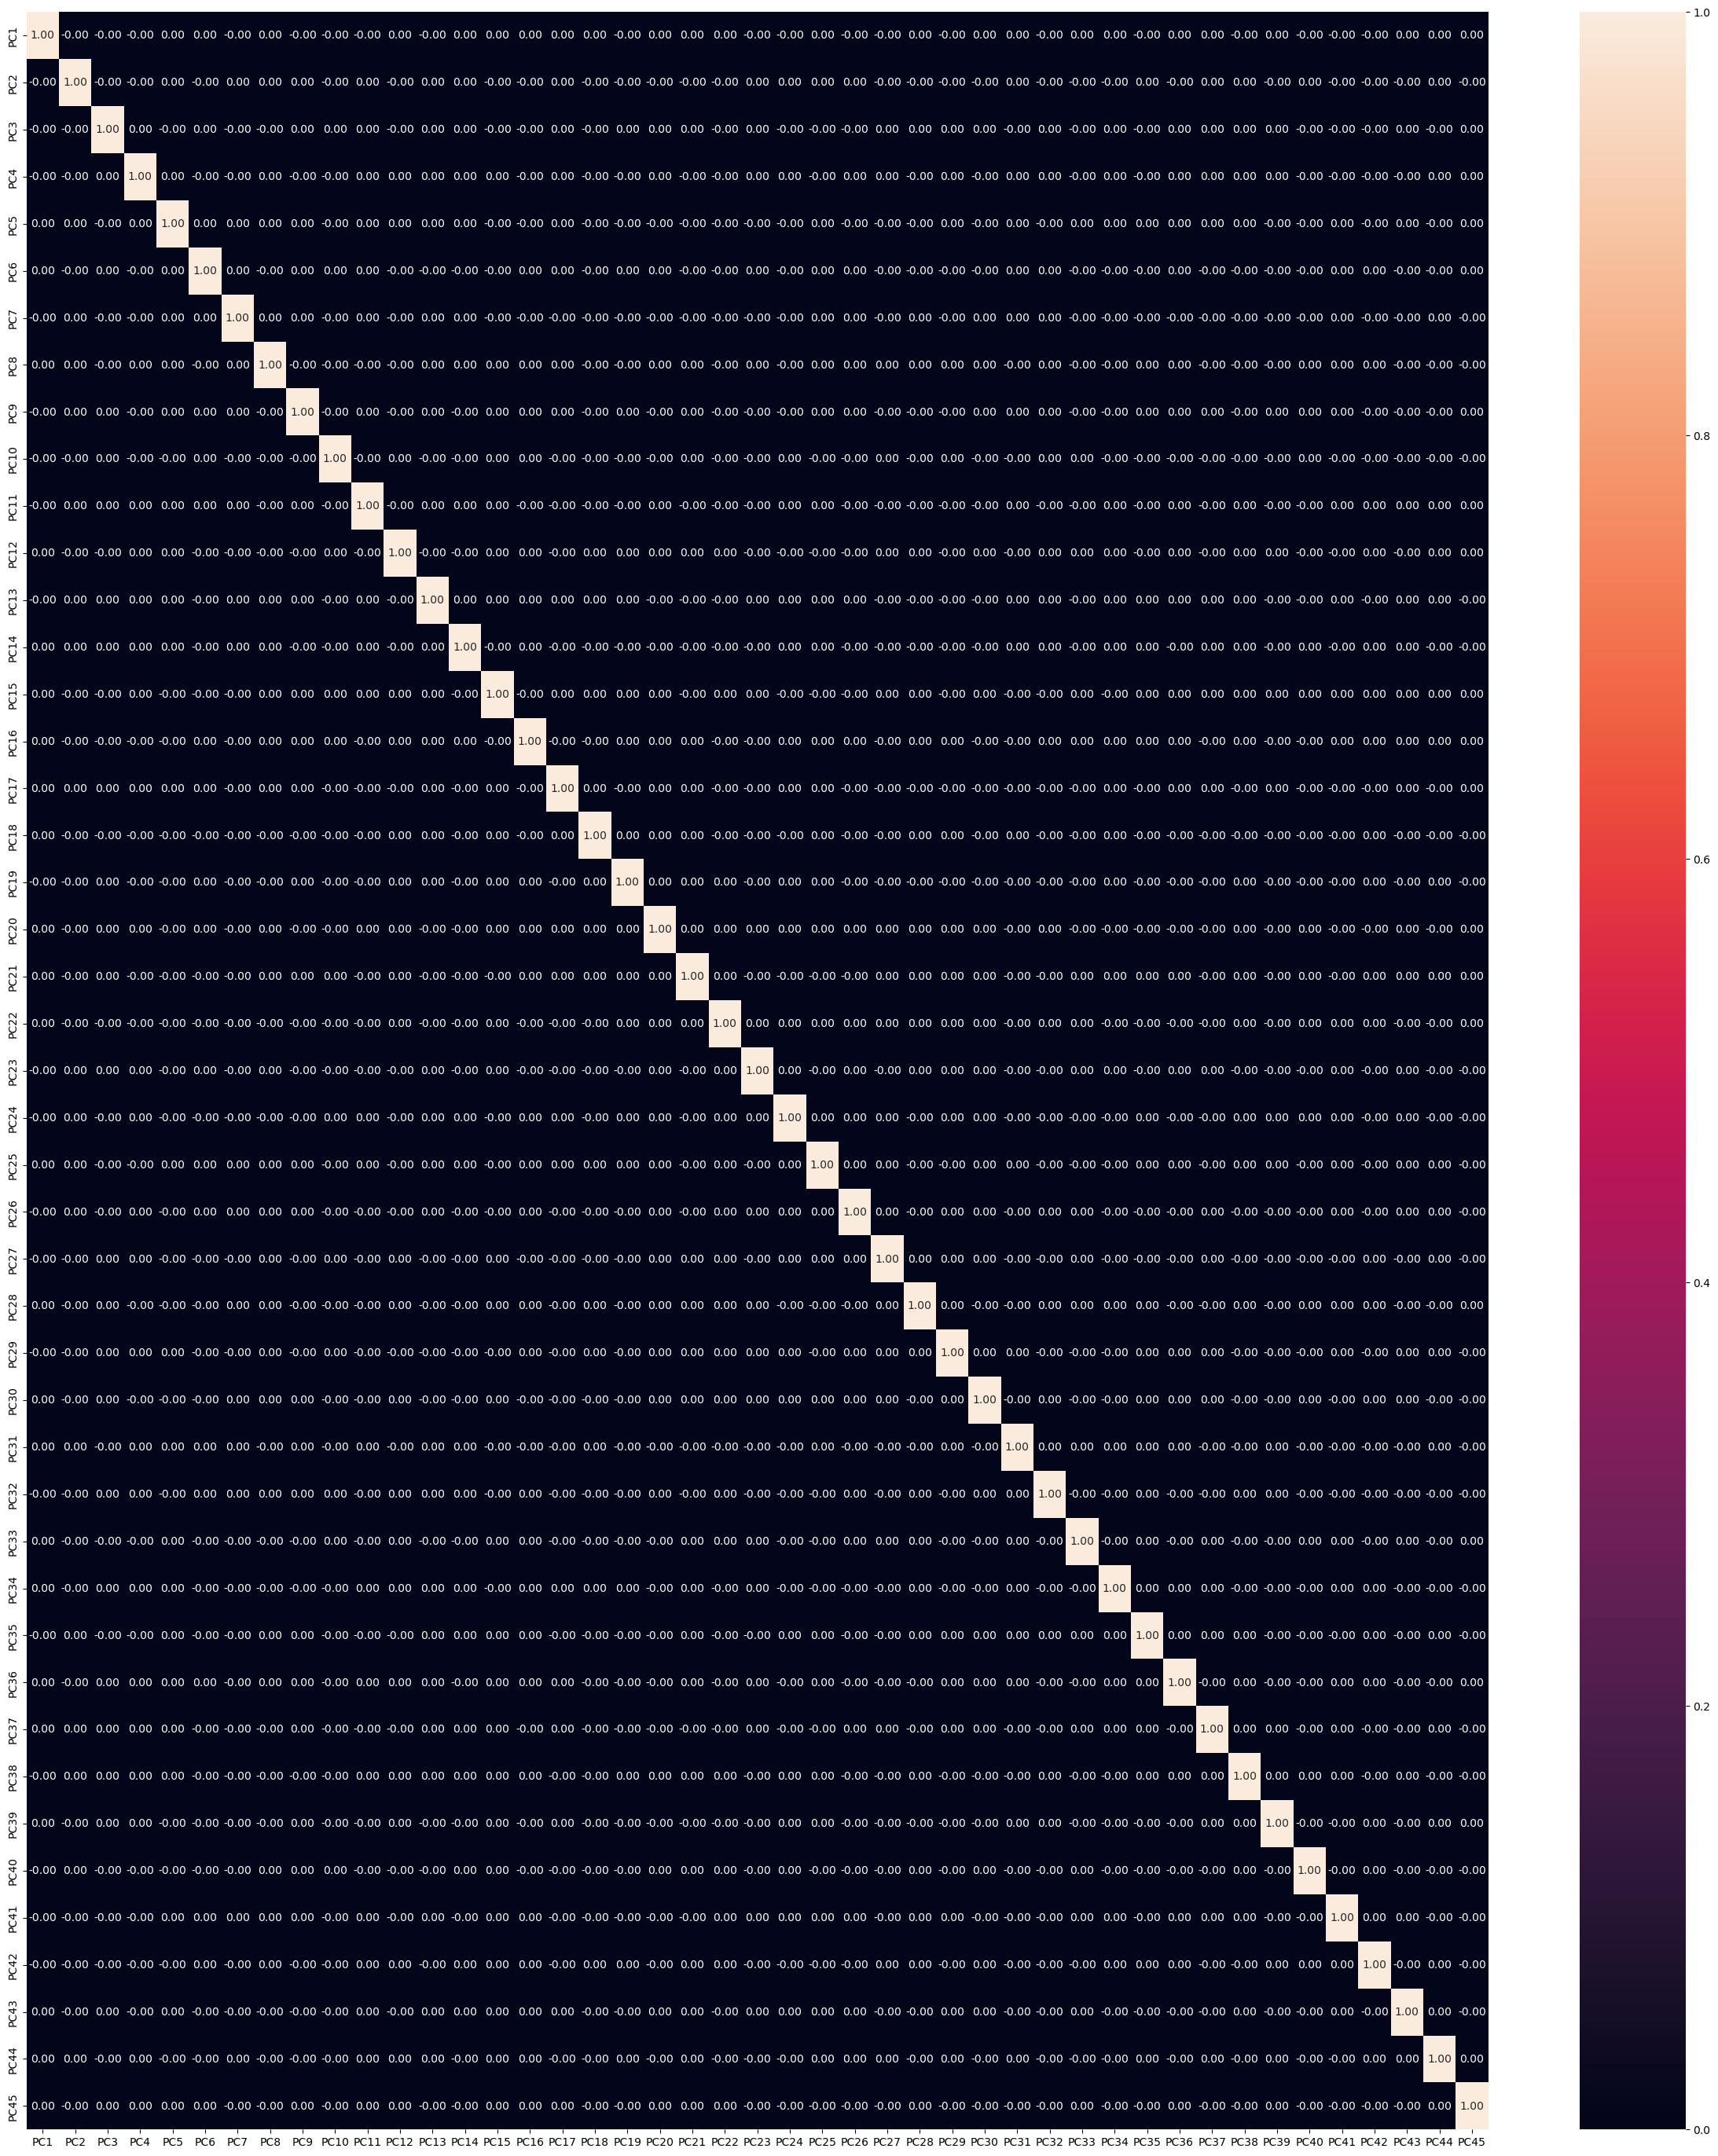

In [27]:
# checking corelation amoung the variables
plt.figure(figsize=(30,35))
sns.heatmap(principal_Df.corr(),fmt=".2f",annot=True)

In [28]:
# dividing dependent and independent columns
x = principal_Df
y = data.target

In [29]:
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,1.366923,-0.000636,-0.402431,-0.128765,-0.545881,-2.661299,-1.320671,0.308890,-0.953273,-1.220924,...,0.190838,0.464608,0.999905,0.049608,0.585055,0.377067,-1.418832,-0.822626,0.164751,0.559505
1,-0.871790,1.000563,0.881721,-0.992198,-2.035722,0.705292,0.037389,1.488223,-1.656419,1.082660,...,-0.686401,0.081641,0.621326,-0.641717,0.394955,0.148981,0.087755,0.718573,0.062985,0.265365
2,-1.776699,-0.766402,-1.229443,3.049990,0.537194,-1.272042,0.745266,2.640906,-1.093703,1.947547,...,1.589889,0.244410,0.641412,0.498498,-0.821143,1.323581,-3.126645,0.948320,-0.558646,-0.185937
3,-1.653450,0.134803,0.500191,0.102607,0.491352,1.682848,-0.974899,-0.138383,2.509067,0.467976,...,0.608343,-0.542523,1.249901,0.527597,0.056246,-0.245224,0.833738,-0.157007,-0.038256,-1.231842
4,-1.911953,-0.431362,1.580045,-1.297609,0.861455,0.460791,1.364608,1.412205,1.711588,-0.021488,...,1.356475,0.009044,0.058521,0.734468,-0.493489,0.001066,0.192918,0.132277,0.064459,0.395791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,-0.784471,-1.286978,0.850664,2.391286,0.245126,-0.029796,-0.454664,-1.632404,-1.716057,-1.007370,...,-0.670155,0.191020,0.272267,-0.096644,-0.176145,0.188648,0.185900,-0.650062,0.325649,1.234700
595208,1.561005,-0.913720,1.395848,-0.958697,1.000152,-0.131226,-0.542150,-1.780704,-0.687736,2.296911,...,0.439423,0.370298,-1.190161,1.889725,2.784936,-1.288989,0.185827,2.750277,-0.588070,-0.142381
595209,-2.150795,-0.604851,0.801433,0.152102,0.858559,2.052737,-0.205515,-0.353523,-0.379094,-1.394710,...,-0.595261,0.090237,0.137843,-0.616798,0.171420,0.594780,-1.473087,0.372357,-0.055541,0.063290
595210,0.065964,-1.374636,1.303297,0.848957,0.777663,-0.268840,1.357852,2.617733,-0.117471,1.390781,...,-0.453307,0.172676,-0.234065,0.774122,-0.676748,0.307736,-0.110457,0.905796,-0.180762,0.083480


In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

#### Train test Split :

In [32]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [33]:
x_train.shape

(416648, 45)

In [34]:
x_test.shape

(178564, 45)

In [35]:
## balancing the data
data.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

#### Data Balancing using Smote:

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [38]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [39]:
y_smote.value_counts()

target
0    401510
1    401510
Name: count, dtype: int64

In [40]:
from collections import Counter# importing counter to check count of each label
print("Actual",Counter(y_train))# checking count for each class
print("After smote",Counter(y_smote))# checking count after sampling for  each class

Actual Counter({0: 401510, 1: 15138})
After smote Counter({0: 401510, 1: 401510})


In [41]:
x_smote

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-0.515948,-1.344813,2.496197,3.168853,-1.698345,-1.267255,-0.039530,-2.257559,-0.084401,-0.002376,...,-1.006512,-0.227778,0.582915,-0.257449,0.527545,-0.190621,-0.026977,0.682242,-0.224801,-0.490731
1,-0.953712,-0.611064,0.378731,-0.219418,0.519660,0.820411,1.160572,0.284713,-1.778127,-0.039751,...,0.735704,0.196118,0.115052,0.396444,0.357446,-0.571722,1.501052,0.298094,0.003864,-0.255631
2,-1.270416,0.440976,-0.646682,-0.342607,2.290852,-0.504987,-2.724184,-0.950980,1.168922,-0.118746,...,-0.946292,0.298488,-1.456653,1.508833,0.765081,-0.651656,0.380068,-0.406216,0.009567,-0.445680
3,-1.706941,0.141780,0.685942,0.989072,-1.370848,-0.108890,-0.893490,-0.428837,-3.233624,-0.738809,...,-1.262838,-0.252815,-0.042298,-0.502327,-0.591707,0.643404,-0.713531,1.558025,-0.012148,0.854588
4,-0.310118,-0.214256,0.140778,-0.256794,0.953644,-2.021887,-0.523998,-1.240164,-0.094753,2.713418,...,0.887778,0.074942,-2.102419,1.549041,1.983549,-1.003223,-0.589430,-0.971248,-0.077768,0.076663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803015,0.409228,-0.951193,2.090041,1.480771,0.932439,-0.522274,-1.464314,1.213536,-0.077706,1.337867,...,1.454118,0.901619,-0.837852,1.526203,1.487263,0.356004,-3.192780,-0.287382,-0.422477,-1.098732
803016,-1.409557,0.442753,-2.204989,0.715979,0.337799,-0.494816,-0.359835,-0.041992,0.459339,-1.051057,...,-0.284854,0.123549,-0.341854,0.135779,-0.872346,0.115868,0.794449,-0.931010,0.493942,1.516059
803017,-0.532759,-0.661671,2.473368,3.528033,-3.507171,0.176973,-1.407920,0.776583,1.099801,-1.111873,...,0.824201,-0.069945,0.349812,1.569566,0.542285,-0.530729,0.333501,0.100473,0.063096,0.268707
803018,-1.387662,1.034354,0.871601,-2.182769,-1.770531,-0.238138,0.484191,-0.902950,0.068935,0.533247,...,-0.818117,-0.083031,-1.030452,-0.347392,-0.593149,0.384162,-0.376804,-1.266984,0.230544,0.419561


In [42]:
y_smote

0         0
1         0
2         0
3         0
4         0
         ..
803015    1
803016    1
803017    1
803018    1
803019    1
Name: target, Length: 803020, dtype: int64

#### We also tried To implement SmoteTomek:

In [44]:
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42, n_jobs=-1)  # Use all available CPU cores

# # Apply SMOTETomek
# X_resampled, y_resampled = smt.fit_resample(x_train, y_train)

#### We also tried To implement RandomUnderSampler:

In [77]:
# # Undersampling
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# # Check original class distribution
# print("Before Undersampling:", Counter(y_train))

# # Apply undersampling
# rus = RandomUnderSampler(random_state=42)
# x_under, y_under = rus.fit_resample(x_train, y_train)

# # Check class distribution after undersampling
# print("After Undersampling:", Counter(y_under))

## Model Creation :

### Logistic Regression :

In [75]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_smote,y_smote)

LogisticRegression()

In [77]:
y_predict = LR.predict(x_test)

### Model Evaluation:

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [82]:
print(confusion_matrix(y_test,y_predict))

[[104888  67120]
 [  2954   3602]]


In [84]:
recall_score(y_test,y_predict)

0.5494203782794387

In [86]:
precision_score(y_test,y_predict) 

0.050931817539096744

In [88]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75    172008
           1       0.05      0.55      0.09      6556

    accuracy                           0.61    178564
   macro avg       0.51      0.58      0.42    178564
weighted avg       0.94      0.61      0.73    178564



In [90]:
f1_score(y_test,y_predict)

0.09322187427210848

#### Conclusion : Logistic Regression showing Good results for Majority Class Only.

### SVM :

* Since Data is very large SVM is unable to fit the model.

In [160]:
# from sklearn.svm import SVC
# svclassifier = SVC() ## base model with default parameters
# svclassifier.fit(x_smote, y_smote)

### Decision Tree :

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_smote,y_smote)
y_predict_dt=dt.predict(x_test)

#### Model Evaluation:

In [94]:
accuracy_score(y_test,y_predict_dt)

0.7927409780246858

In [96]:
confusion_matrix(y_test,y_predict_dt)

array([[140198,  31810],
       [  5199,   1357]], dtype=int64)

In [98]:
recall_score(y_test,y_predict_dt)

0.20698596705308114

In [100]:
precision_score(y_test,y_predict_dt)

0.040914161666716915

In [102]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88    172008
           1       0.04      0.21      0.07      6556

    accuracy                           0.79    178564
   macro avg       0.50      0.51      0.48    178564
weighted avg       0.93      0.79      0.85    178564



In [104]:
y_train_predict=dt.predict(x_train)#predicting training data to check training performance
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
acc_train=accuracy_score(y_train,y_train_predict) #checking training accuracy
acc_train

1.0

In [108]:
test_acc=accuracy_score(y_test,y_predict_dt)#testing accuracy
test_acc

0.7927409780246858

### Conclusion : As we can see in classification Report It is showing High Precision,recall and f1-score for Majority Class only.

### Random Forest Classifier:

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_clf =RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42,class_weight='balanced')
#object creation ,taking 100 decision tree in random forest
rf_clf.fit(x_smote,y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

### Model Evaluation :

In [99]:
y_predict_RF=rf_clf.predict(x_test)#testing

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [103]:
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82    172008
           1       0.04      0.35      0.08      6556

    accuracy                           0.71    178564
   macro avg       0.51      0.53      0.45    178564
weighted avg       0.93      0.71      0.80    178564



In [105]:
print(precision_score(y_test,y_predict_RF))

0.04491627621928316


#### Conclusion : Showing High Precision,recall and f1-score for Majority Class only And very Low Score For Minority Class.

### KNN :

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_smote, y_smote)

KNeighborsClassifier()

In [111]:
y_pred_knn = knn2.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [115]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76    172008
           1       0.04      0.42      0.07      6556

    accuracy                           0.61    178564
   macro avg       0.50      0.52      0.42    178564
weighted avg       0.93      0.61      0.73    178564



In [117]:
print(precision_score(y_test,y_pred_knn))

0.040891319046359176


### ANN :

In [120]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [168]:
# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_smote.shape[1],)),  # Input Layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden Layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])


In [170]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [172]:
history = model.fit(x_smote, y_smote, epochs=50, batch_size=500, validation_data=(x_test, y_test))

Epoch 1/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6019 - loss: 0.6621 - val_accuracy: 0.6831 - val_loss: 0.5818
Epoch 2/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7009 - loss: 0.5748 - val_accuracy: 0.7261 - val_loss: 0.5467
Epoch 3/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7266 - loss: 0.5447 - val_accuracy: 0.7312 - val_loss: 0.5465
Epoch 4/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7404 - loss: 0.5267 - val_accuracy: 0.7856 - val_loss: 0.4838
Epoch 5/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7498 - loss: 0.5137 - val_accuracy: 0.7868 - val_loss: 0.4778
Epoch 6/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7580 - loss: 0.5012 - val_accuracy: 0.8006 - val_loss: 0.4619
Epoch 7/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7648 - loss: 0.4887 - val_accuracy: 0.8204 - val_loss: 0.4382
Epoch 8/50
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7724 - loss: 0.475

In [180]:
# Predictions
y_pred_ANN = (model.predict(x_test) > 0.5).astype("int32")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_ANN)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print(classification_report(y_test, y_pred_ANN))

5581/5581 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Accuracy: 0.8743
              precision    recall  f1-score   support

           0       0.96      0.90      0.93    172008
           1       0.05      0.13      0.07      6556

    accuracy                           0.87    178564
   macro avg       0.51      0.52      0.50    178564
weighted avg       0.93      0.87      0.90    178564



In [188]:
print(precision_score(y_test,y_pred_ANN))

0.048236632536973835


#### Conclusion : This Model is also Showing High Precision,recall and f1-score for Majority Class only And very Low Score For Minority Class.

### XGBOOST :

In [81]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    max_depth=6,  
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [83]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_xgb = xgb_model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83    172008
           1       0.04      0.34      0.08      6556

    accuracy                           0.71    178564
   macro avg       0.51      0.53      0.45    178564
weighted avg       0.93      0.71      0.80    178564



conclusion : Showing High Precision,recall and f1-score for Majority Class only And very Low Score For Minority Class.

#### Lets try Smote on whole data and the Evaluate the Result :

In [110]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y) 
y_smote.value_counts()

target
0    401510
1    401510
Name: count, dtype: int64

### Random Forest :

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf_clf =RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42,class_weight='balanced')
#object creation ,taking 100 decision tree in random forest
rf_clf.fit(x_smote,y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [115]:
y_predict_RF=rf_clf.predict(x_test)#testing

In [116]:
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83    172008
           1       0.05      0.35      0.08      6556

    accuracy                           0.71    178564
   macro avg       0.51      0.53      0.45    178564
weighted avg       0.93      0.71      0.80    178564



### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_sm,y_sm)

LogisticRegression()

In [121]:
y_predict_1 = LR.predict(x_test)

In [123]:
print(classification_report(y_test,y_predict_1))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75    172008
           1       0.05      0.55      0.09      6556

    accuracy                           0.61    178564
   macro avg       0.51      0.58      0.42    178564
weighted avg       0.94      0.61      0.73    178564



### DecisionTreeClassifier :

In [132]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)
y_hat_1=dt.predict(x_test)

In [134]:
print(classification_report(y_test,y_hat_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172008
           1       1.00      1.00      1.00      6556

    accuracy                           1.00    178564
   macro avg       1.00      1.00      1.00    178564
weighted avg       1.00      1.00      1.00    178564



In [138]:
precision_score(y_test,y_hat_1)

1.0

In [142]:
y_train_predict_1=dt.predict(x_train)#predicting training data to check training performance
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
acc_train_1=accuracy_score(y_train,y_train_predict_1) #checking training accuracy
acc_train_1

1.0

In [146]:
test_acc=accuracy_score(y_test,y_hat_1)#testing accuracy
test_acc

1.0

In [174]:
y_test

146363    0
177891    0
264807    0
417051    0
383956    0
         ..
448485    0
115831    0
87132     0
377789    0
17397     0
Name: target, Length: 178564, dtype: int64

In [150]:
y_hat_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
y_test[y_test == 1]

192313    1
418383    1
86114     1
300236    1
207059    1
         ..
414380    1
53024     1
503937    1
505155    1
511498    1
Name: target, Length: 6556, dtype: int64

In [182]:
y_hat_1[y_hat == 1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [186]:
y_test.value_counts()

target
0    172008
1      6556
Name: count, dtype: int64

In [196]:
counts = np.bincount(y_hat_1)
print(f"Count of 0's: {counts[0]}, Count of 1's: {counts[1]}")

Count of 0's: 172008, Count of 1's: 6556


### Conclusion : As we can see the we got 100% precision score here when we give the whole data to smote and apply Decision Tree Classifier.

### Final Conclusion of the Project :

In this project, we aimed to predict insurance claim approvals using a dataset containing 595212 rows and 59 features, with a significant class imbalance. To address the imbalance, we applied Synthetic Minority Over-sampling Technique (SMOTE) on the training data and evaluated multiple classification models.

Our findings indicate that applying SMOTE only on the training data resulted in models that exhibited high precision for the majority class but low Score for the minority class, leading to poor generalization for rare claim approvals. However, when SMOTE was applied to the "Entire dataset" before model training, the Decision Tree classifier achieved 100% Good Results.

We have explored various techniques such as Random Undersampling, SMOTETomek, and also outlier handling , yet we have not been able to achieve satisfactory results in improving the model's performance."